In [1]:
from main_lab import analyzer
models_7b = [
"Qwen/Qwen1.5-7B",
"meta-llama/Llama-2-7b-hf",
"deepseek-ai/deepseek-llm-7b-base",
"mistralai/Mistral-7B-v0.1"
]
models_mamba_like = [
    "tiiuae/falcon-mamba-7b",
]
models_small = [
"EleutherAI/pythia-2.8b",
"openai-community/gpt2-large"
]
model_name = models_small[1]
from dataclasses import dataclass
@dataclass
class ArgumentParser:
    transform: str = "PCA"              # dimensionality reduction method: "PCA" or "PLS"
    Tdim: int = 1                       # number of target dimensions after transform
    k: int = 30                         # group/examples
    num_examples: int = 3               # number of demonstrations
    context: str = 'random'             # type of context (e.g., 'random' vs. fixed)
    data: str = 'numerics'              # dataset type to use numerics or symbols
    groups = [1,2,3,4]   # groups to test; here each group is 10**i
    upper_bound: int = 10**groups[-1]   # upper bound for generated numbers (max context size)
    save: bool = True                   # whether to save results
    plot: bool = True                   # whether to plot results
    model_name: str = model_name  # model identifier (e.g., huggingface repo name)
    device: str = "0"                   # GPU device number (string)
    runs: int = 3                       # number of runs
args = ArgumentParser()

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
res = analyzer(args)

In [3]:
# run for numerics
test_ctx = [0,1,2,3,4,5]
res.data ='numerics'
results = {}
for x in test_ctx:
    res.num_examples = x
    resultsx = res.run_multiple()
    temp = sorted(resultsx[0].items(), key=lambda item: item[1]['EV'],reverse=True)
    results[x] = temp



Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment
Starting new experiment


In [4]:
chosen_layers = [results[x][0][0] for x in test_ctx] # the layer of max EV in each xase
from collections import Counter
majority_layer = Counter(chosen_layers).most_common(1)[0][0]

In [5]:
chosen_layers

[35, 18, 18, 18, 18, 18]

In [6]:
# The original code tried to find the index of (24, sth) in results[0], which is a list of (layer, dict) tuples.
# Let's print the layers in results[0] to check for 24
layers_in_results0 = [layer for layer, _ in results[0]]
print(layers_in_results0)
if 18 in layers_in_results0:
    idx_24 = layers_in_results0.index(18)
    print(f"Index of layer 24: {idx_24}")
else:
    print("Layer 24 is not in results[0]")

[35, 34, 33, 24, 25, 28, 26, 23, 27, 31, 22, 21, 29, 20, 30, 32, 19, 1, 18, 17, 16, 15, 14, 13, 12, 11, 10, 2, 9, 7, 6, 8, 3, 5, 4]
Index of layer 24: 18


In [8]:
new_res = {}
new_res[0] = results[0][18]
new_res[1] = results[1][0]
new_res[2] = results[2][0]
new_res[3] = results[3][0]
new_res[4] = results[4][0]
new_res[5] = results[5][0]


In [9]:
import pickle
file_path = f"ICLR_results/Figures_3_data/{model_name.replace('/', '-')}_Ctx_ex.pkl"
with open(file_path, "wb") as f:
    pickle.dump(new_res, f)

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New 

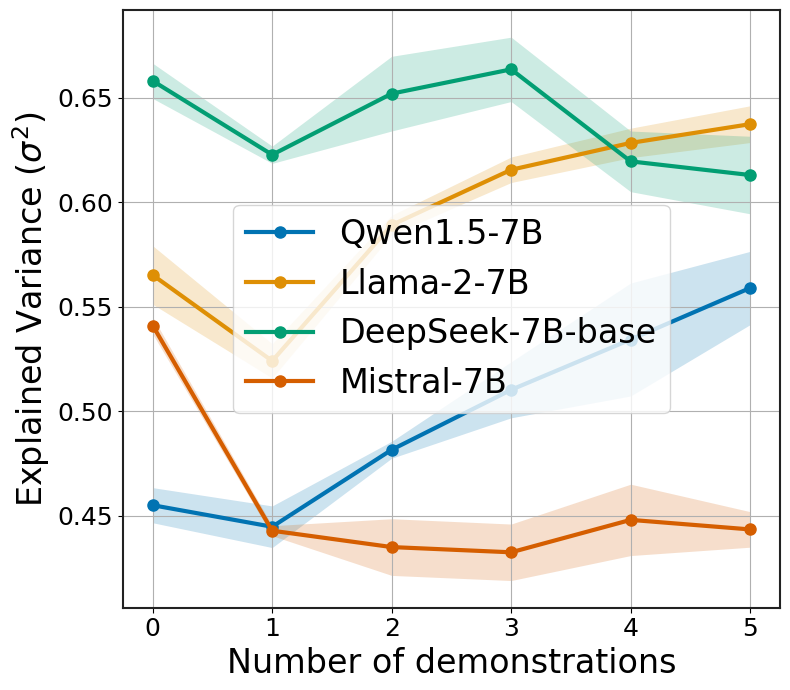

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New 

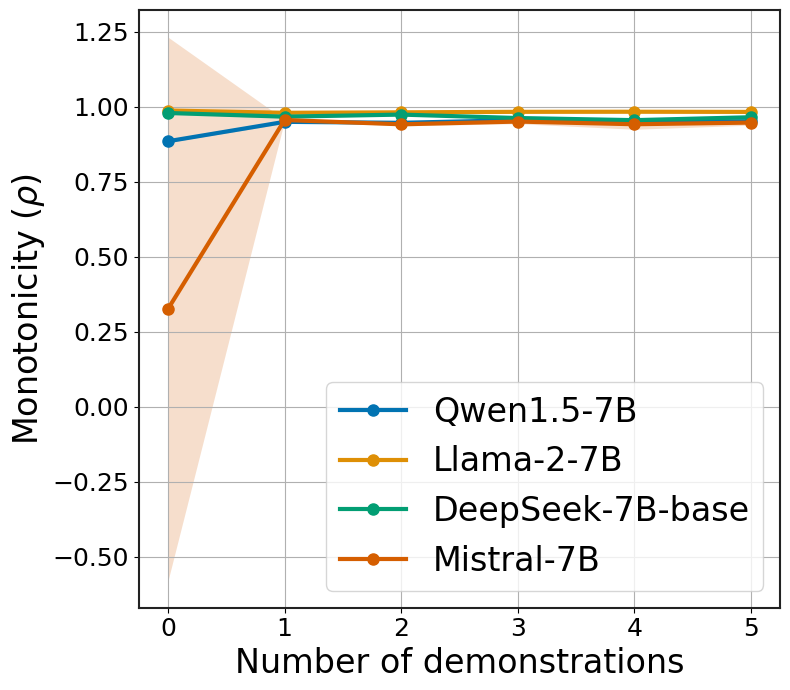

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times, CMU Serif
findfont: Generic family 'serif' not found because none of the following families were found: Times New 

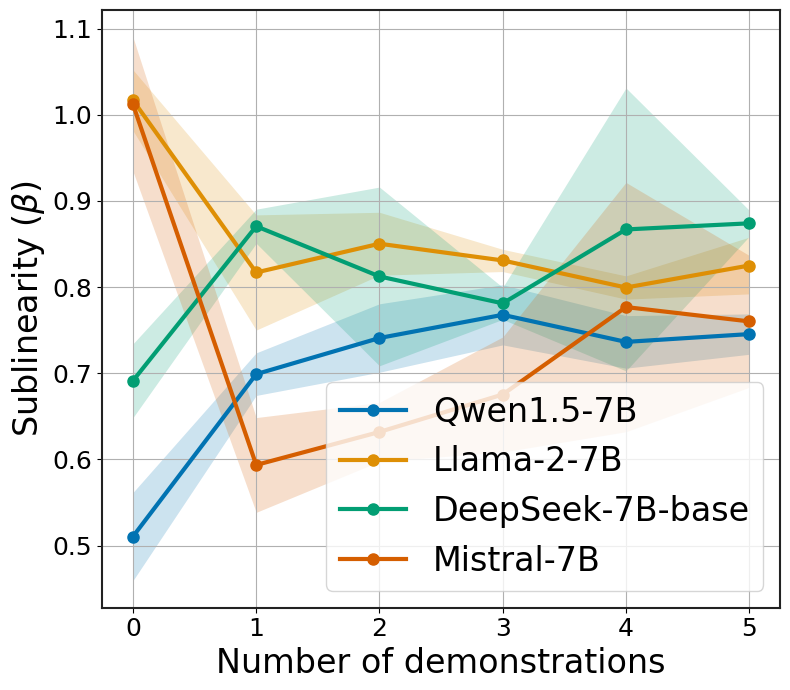

In [ ]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- Load rcParams from Table_3.ipynb as in file_context_0, lines 6-20 ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "CMU Serif"],
    "axes.titlesize": 18,
    "axes.labelsize": 24,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 24,
    "figure.titlesize": 20,
    "axes.linewidth": 1.5,
    "lines.linewidth": 3,
    "savefig.dpi": 300,
    "axes.grid": True,
    "axes.edgecolor": "#222222",
})

# --- Professional color palette (from seaborn or custom for four lines) ---
color_palette = sns.color_palette("colorblind", 4)
# Alternative: color_palette = ["#377eb8", "#e41a1c", "#4daf4a", "#984ea3"]

models_7b = [
    "Qwen/Qwen1.5-7B",
    "meta-llama/Llama-2-7b-hf",
    "deepseek-ai/deepseek-llm-7b-base",
    "mistralai/Mistral-7B-v0.1"
]

# Human-friendly names for plotting/legend
model_pretty_names = {
    "Qwen/Qwen1.5-7B": "Qwen1.5-7B",
    "meta-llama/Llama-2-7b-hf": "Llama-2-7B",
    "deepseek-ai/deepseek-llm-7b-base": "DeepSeek-7B-base",
    "mistralai/Mistral-7B-v0.1": "Mistral-7B"
}

# Data structures per metric
x = None
ev_all = {}
ev_std_all = {}
rho_all = {}
rho_std_all = {}
beta_all = {}
beta_std_all = {}

for namee in models_7b:
    file_path = f"ICLR_results/Figures_4_data/{namee.replace('/', '-')}_Ctx_ex.pkl"
    with open(file_path, "rb") as f:
        new_res = pickle.load(f)

    _x = []
    ev = []
    ev_std = []
    rho = []
    rho_std = []
    beta = []
    beta_std = []

    for k, v in new_res.items():
        metrics = v[1]
        _x.append(k)
        ev.append(float(metrics['EV']))
        ev_std.append(float(metrics['EV_std']))
        rho.append(float(metrics['rho']))
        rho_std.append(float(metrics['rho_std']))
        beta.append(float(metrics['beta']))
        beta_std.append(float(metrics['beta_std']))

    if x is None:
        x = _x  # Set x from the first model, assuming all models share same x-axis

    pretty_name = model_pretty_names.get(namee, namee)
    ev_all[pretty_name] = ev
    ev_std_all[pretty_name] = ev_std
    rho_all[pretty_name] = rho
    rho_std_all[pretty_name] = rho_std
    beta_all[pretty_name] = beta
    beta_std_all[pretty_name] = beta_std

metric_titles = [
    "Explained Variance ($\\sigma^2$)",
    "Monotonicity ($\\rho$)",
    "Sublinearity ($\\beta$)"
]

results_all = [
    (ev_all, ev_std_all),
    (rho_all, rho_std_all),
    (beta_all, beta_std_all)
]
metric_filenames = [
    "explained_variance",
    "monotonicity",
    "sublinearity"
]

output_dir = "ICLR_results/figure_4/"
os.makedirs(output_dir, exist_ok=True)

for idx, ((res, res_std), label, fname) in enumerate(zip(results_all, metric_titles, metric_filenames), 1):
    plt.figure(figsize=(8, 7))
    for i, pretty_name in enumerate(models_7b):
        model_label = model_pretty_names.get(pretty_name, pretty_name)
        y = np.array(res[model_label])
        y_std = np.array(res_std[model_label])
        plt.plot(
            x, y, marker="o", label=model_label, 
            color=color_palette[i], linewidth=3, markersize=8
        )
        plt.fill_between(
            x, y - y_std, y + y_std, color=color_palette[i], alpha=0.20, linewidth=0
        )
    plt.xlabel("Number of demonstrations")
    plt.ylabel(label)
    plt.xticks(x)
    plt.legend(frameon=True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{fname}.pdf"), bbox_inches="tight")
    plt.show()
